### Урок 8. Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [78]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [79]:
# boston_dataset = load_boston()
# X = boston_dataset.data
# y = boston_dataset.target
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

In [80]:
# dataset preview
boston_data = load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [81]:
# data normalization
d = preprocessing.normalize(df_boston ,axis=0)
scaled_df = pd.DataFrame(d, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO', 'B','LSTAT','target'])
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000030,0.030868,0.007853,0.0,0.042208,0.046222,0.039107,0.041904,0.003442,0.029798,0.036604,0.047927,0.015241,0.043845
1,0.000130,0.000000,0.024035,0.0,0.036795,0.045139,0.047324,0.050890,0.006883,0.024362,0.042585,0.047927,0.027973,0.039461
2,0.000130,0.000000,0.024035,0.0,0.036795,0.050510,0.036648,0.050890,0.006883,0.024362,0.042585,0.047436,0.012334,0.063393
3,0.000154,0.000000,0.007411,0.0,0.035932,0.049196,0.027471,0.062109,0.010325,0.022349,0.044738,0.047653,0.008998,0.061018
4,0.000329,0.000000,0.007411,0.0,0.035932,0.050243,0.032509,0.062109,0.010325,0.022349,0.044738,0.047927,0.016312,0.066133


In [82]:
X=np.array(scaled_df.iloc[:, 0:13])
y=np.array(df_boston.iloc[:, 13:14]).ravel()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Itarations stopped at step 34
None


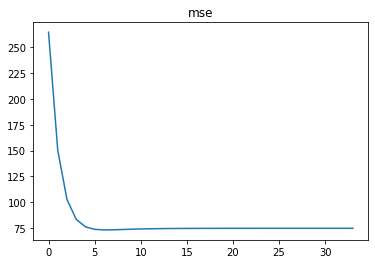

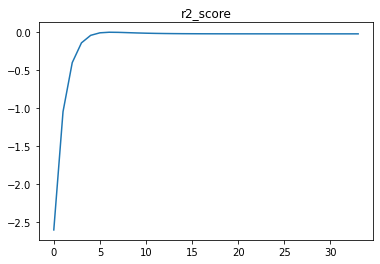

In [83]:
eta_0=0.001
rand_state=42
epsilon=0.0001 # accuracy
steps=1000
sgd_regressor=SGDRegressor(learning_rate='constant', alpha=0.8, eta0=eta_0, fit_intercept=True, random_state=rand_state)
w_current=np.random.random(len(X[0])) # initalize weights with random numbers
# w_current=X[0]
weight_evolution, mse_evolution, r2_evolution=[], [], [] # chasnge of weoght and error
for step in range(steps):
    sqd_regressor=sgd_regressor.partial_fit(X_train, y_train) # make one step
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_)) #the distance.euclidean function shows how much the weights have shifted from w_current to the current value of the weights, which is stored in the sgd_regressor class
    if weight_evolution[-1]<epsilon:
        print (print("Itarations stopped at step %d" % step)); break
    mse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    r2_evolution.append(r2_score(y_valid, sgd_regressor.predict(X_valid)))
    w_current=sgd_regressor.coef_.copy()
    
plt.plot(range(step), mse_evolution)
plt.title("mse")
plt.show()
plt.plot(range(step), r2_evolution)
plt.title("r2_score")
plt.show()

In [84]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [85]:
boston_data = load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
d = preprocessing.normalize(df_boston ,axis=0)
scaled_df = pd.DataFrame(d, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO', 'B','LSTAT','target'])
X=np.array(scaled_df.iloc[:, 0:13])
y=np.array(df_boston.iloc[:, 13:14]).ravel()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
def gradient (X, y, eta, w_current)->np.array:
    """gradient for linear regression"""
    n=X.shape[0] # number of train examples
    y_hat=X.dot(w_current.T) # predict linear regression results
    error = y - y_hat # deviation
    grad=np.multiply(X,error).sum(axis=0)*(-1.0)*2.0/n #gradient for linear regression
    return grad, error

In [87]:
def eval_w_next(X, y, eta, w_current):
    """Next step"""
    grad, error=gradient(X,y,eta,w_current)
    w_next=w_current-eta*grad # weights at next iteration
    weight_evolution=distance.euclidean(w_current, w_next) # weights change
    return (w_next, weight_evolution, grad)

In [88]:
def gradient_descent(X:np.array, y:np.array, eta=0.01, epsilon=0.001)->np.array:
    
    m=X.shape[1] # features number (gradient dimension)
    w=np.random.random(m).reshape(1,-1) # initialize weights with random numbers
    w_next, weight_evolution, grad=eval_w_next(X, y, eta, w)
    step=0
    while weight_evolution>epsilon:
        w=w_next
        w_next, weight_evolution, grad=eval_w_next(X, y, eta, w)
        step+=1
#         if step % 100 ==0:
#             print("step %s |w-w_next|=%.5f, grad=%s, weight_evolution=%.3f" % (step, weight_evolution, grad, weight_evolution)) 
    print(f"Stopped at {step} iteration, weight_evolution={weight_evolution}, grad={grad}")
    return w

In [89]:
eta_0=0.002
epsilon=0.0001
# add a trivial feature w_0, a column of ones
X_train=np.hstack([np.ones(X_train.shape[0]).reshape(-1,1), X_train]) 
X_valid=np.hstack([np.ones(X_valid.shape[0]).reshape(-1,1), X_valid])
w=gradient_descent(X_train, y_train.reshape(-1,1), eta=eta_, epsilon=epsilon_)


Stopped at 104746 iteration, weight_evolution=0.000999999575182352, grad=[-0.00336963 -0.00909145  0.00359512  0.01130235  0.00303492  0.00263061
 -0.03293828 -0.00717183  0.04334174 -0.01577156  0.00562762  0.01806495
 -0.01198842  0.07735525]
